# 2.2 - La panadería de Güelita

In [1]:
import pylab as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

In [2]:
breadbasket=pd.read_csv('../data/breadbasket_dms.csv')

breadbasket.tail(10)

,Date,Time,Transaction,Item
21283,2017-04-09,14:30:09,9681,Tea
21284,2017-04-09,14:30:09,9681,Spanish Brunch
21285,2017-04-09,14:30:09,9681,Christmas common
21286,2017-04-09,14:32:58,9682,Muffin
21287,2017-04-09,14:32:58,9682,Tacos/Fajita
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry
21292,2017-04-09,15:04:24,9684,Smoothies


In [3]:
breadbasket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [4]:
breadbasket.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [5]:
breadbasket['Datetime']=pd.to_datetime(breadbasket.Date+' '+breadbasket.Time,
                                      format='%Y-%m-%d %H:%M:%S')

breadbasket.head()

,Date,Time,Transaction,Item,Datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [6]:
breadbasket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  object        
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   Datetime     21293 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 831.9+ KB


In [7]:
breadbasket.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [8]:
breadbasket.Item.nunique()

95

In [9]:
breadbasket.Item.value_counts().nlargest(10)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

In [10]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']

food=beverage+other+kids+snacks+bread+breakfast_pastry+dessert+condiments+breakfast+lunch

other_food=[e for e in breadbasket.Item.unique() if e not in food]

food_list=[beverage, other, kids, snacks, bread, breakfast_pastry, dessert, condiments, breakfast, lunch]
food_names=['beverage', 'other', 'kids', 'snacks', 'bread', 'breakfast_pastry', 'dessert', 'condiments', 'breakfast', 'lunch']

for i in range(len(food_names)):
    breadbasket[food_names[i]]=np.where(breadbasket.Item.isin(food_list[i]), 1, 0)
    
breadbasket.head()

,Date,Time,Transaction,Item,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0


In [11]:
bread_group=breadbasket.groupby(['Datetime', 'Transaction']).sum()

bread_group.head()

,,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
Datetime,Transaction,,,,,,,,,,
2016-10-30 09:58:11,1,0,0,0,0,1,0,0,0,0,0
2016-10-30 10:05:34,2,0,0,0,0,2,0,0,0,0,0
2016-10-30 10:07:57,3,1,0,0,0,0,0,1,1,0,0
2016-10-30 10:08:41,4,0,0,0,0,0,1,0,0,0,0
2016-10-30 10:13:03,5,1,0,0,0,1,1,0,0,0,0


In [12]:
bread_group.shape

(9531, 10)

In [13]:
bread_group.reset_index(level='Datetime', inplace=True)

bread_group.head()

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
Transaction,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0


In [14]:
bread_group['day']=bread_group.Datetime.dt.day_name()
bread_group['hour']=bread_group.Datetime.dt.hour
bread_group['month']=bread_group.Datetime.dt.month

bread_group.head()

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,day,hour,month
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,Sunday,9,10
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,Sunday,10,10
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,Sunday,10,10
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,Sunday,10,10
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,Sunday,10,10


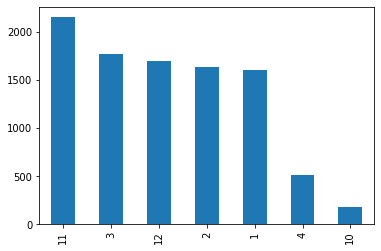

In [15]:
bread_group.month.value_counts().plot(kind='bar');

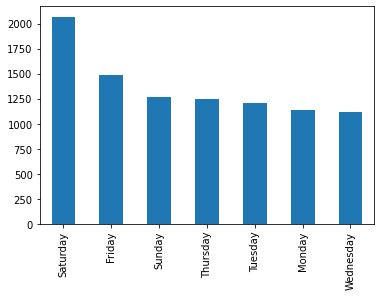

In [16]:
bread_group.day.value_counts().plot(kind='bar');

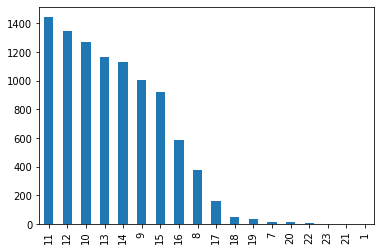

In [17]:
bread_group.hour.value_counts().plot(kind='bar');

In [18]:
bread_dummy=pd.get_dummies(data=bread_group, columns=['day']).drop('Datetime', axis=1)
bread_dummy.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,hour,month,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,9,10,0,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,10,10,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,1,0,0,10,10,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,10,10,0,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,10,10,0,0,0,1,0,0,0


### PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca=PCA(n_components=4).fit_transform(bread_dummy)

pca_df=pd.DataFrame(pca, columns=[f'pc_{i+1}' for i in range(4)])

pca_df.head()

,pc_1,pc_2,pc_3,pc_4
0,3.999820,3.092651,-0.902901,0.259231
1,3.970029,2.123869,-1.251552,1.212450
2,3.966927,2.003758,0.450211,-0.382673
3,3.981419,2.093770,-0.553611,-0.739595
4,3.969554,2.102852,0.062583,0.526933


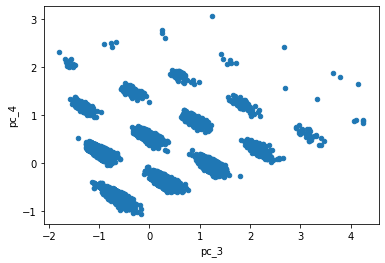

In [21]:
pca_df.plot.scatter(x='pc_3', y='pc_4');

### t-SNE

In [22]:
from sklearn.manifold import TSNE

In [23]:
tsne=TSNE(n_components=2, perplexity=15)

emb=tsne.fit_transform(bread_dummy)

emb_df=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])

emb_df.head()

,emb_1,emb_2
0,73.976112,-41.281281
1,74.759811,-40.750183
2,65.981033,-34.574390
3,75.460678,-38.333843
4,71.387512,-35.501755


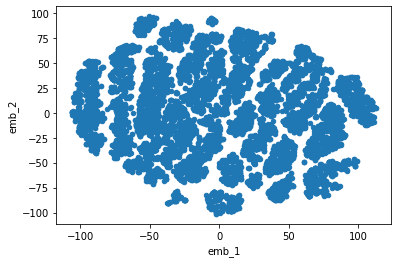

In [24]:
emb_df.plot.scatter(x='emb_1', y='emb_2');

### UMAP

In [25]:
import warnings
warnings.simplefilter('ignore')

from umap import UMAP

In [26]:
umap=UMAP(n_components=2)

emb=umap.fit_transform(bread_dummy)

umap_df=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])

umap_df.head()

,emb_1,emb_2
0,10.122182,4.347303
1,10.158267,4.380866
2,10.448593,4.842490
3,10.162458,4.457803
4,10.154209,4.510618


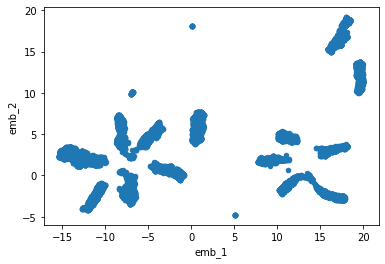

In [27]:
umap_df.plot.scatter(x='emb_1', y='emb_2');

### Clustering

In [28]:
# KMEANS

from sklearn.cluster import KMeans

In [29]:
kmeans=KMeans(n_clusters=4).fit(pca_df)

In [30]:
bread_group['label']=kmeans.predict(pca_df)

bread_group.head()

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,day,hour,month,label
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,Sunday,9,10,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,Sunday,10,10,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,Sunday,10,10,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,Sunday,10,10,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,Sunday,10,10,0


In [31]:
# clusters transacciones por hora

cm=sns.light_palette('green', as_cmap=True)

pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

label,0,1,2,3
hour,,,,
1,0,0,1,0
7,11,0,5,0
8,164,0,211,0
9,438,0,569,0
10,578,0,689,0
11,635,0,810,0
12,544,0,803,0
13,0,662,0,501
14,0,671,0,459


In [32]:
# clusters transacciones por producto (pan)

pd.crosstab(bread_group.beverage, bread_group.label).style.background_gradient(cmap=cm)

label,0,1,2,3
beverage,,,,
0,938,847,1198,627
1,1014,977,1259,703
2,363,485,518,279
3,51,89,99,41
4,3,16,11,5
5,1,4,3,0


In [33]:
# clusters transacciones por dia

pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

label,0,1,2,3
day,,,,
Friday,387,364,475,262
Monday,290,273,360,212
Saturday,463,547,731,327
Sunday,322,323,425,194
Thursday,308,291,396,257
Tuesday,293,330,379,201
Wednesday,307,290,322,202


In [34]:
bread_group[(bread_group.day=='Saturday')&(bread_group.label==0)]

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,day,hour,month,label
Transaction,,,,,,,,,,,,,,,
524,2016-11-05 08:29:32,1,0,0,0,2,1,1,0,1,0,Saturday,8,11,0
525,2016-11-05 08:32:12,0,0,0,0,1,0,1,0,0,0,Saturday,8,11,0
526,2016-11-05 08:36:10,2,1,0,0,0,2,0,0,0,0,Saturday,8,11,0
527,2016-11-05 08:39:13,0,0,0,0,1,0,0,0,0,0,Saturday,8,11,0
528,2016-11-05 08:42:16,0,0,0,0,1,1,0,0,0,0,Saturday,8,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,2016-12-31 12:24:30,1,0,0,0,1,0,0,0,1,0,Saturday,12,12,0
4058,2016-12-31 12:25:40,0,0,0,0,0,0,0,0,0,0,Saturday,12,12,0
4059,2016-12-31 12:32:38,0,0,0,0,0,1,0,0,0,0,Saturday,12,12,0


In [35]:
bread_group[(bread_group.day=='Saturday')&(bread_group.label==2)]

,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,day,hour,month,label
Transaction,,,,,,,,,,,,,,,
4271,2017-01-07 08:23:46,0,0,0,0,0,1,0,0,0,0,Saturday,8,1,2
4272,2017-01-07 08:44:16,0,0,0,0,1,1,0,0,0,0,Saturday,8,1,2
4273,2017-01-07 08:52:19,2,0,0,0,0,0,0,0,0,0,Saturday,8,1,2
4274,2017-01-07 09:02:37,0,0,0,0,1,0,0,0,0,0,Saturday,9,1,2
4275,2017-01-07 09:04:00,2,0,0,0,0,0,0,0,0,0,Saturday,9,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2017-04-08 12:32:33,0,0,0,0,0,0,0,0,0,1,Saturday,12,4,2
9596,2017-04-08 12:36:05,1,0,0,0,0,0,0,0,0,0,Saturday,12,4,2
9597,2017-04-08 12:47:36,0,0,0,0,1,0,0,0,0,0,Saturday,12,4,2


In [36]:
# DBSCAN

from sklearn.cluster import DBSCAN

In [37]:
dbscan=DBSCAN()

bread_group['label']=dbscan.fit_predict(umap_df)


bread_merge=breadbasket.merge(bread_group.reset_index()[['label', 'Transaction']],
                             on='Transaction', how='left')

bread_merge.head()

,Date,Time,Transaction,Item,Datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,label
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0,0


In [38]:
pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

label,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
hour,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,0,0,4,2,1,4,0,2,1,1,1,0,0,0,0,0,0
8,0,0,23,17,36,51,37,26,26,53,35,47,1,23,0,0,0
9,0,30,70,53,101,113,71,64,77,142,76,97,60,53,0,0,0
10,0,85,63,65,89,137,139,82,81,162,76,100,100,88,0,0,0
11,0,124,60,74,86,158,133,74,97,193,113,111,134,88,0,0,0
12,0,87,69,79,74,147,88,73,93,180,100,119,134,104,0,0,0
13,0,65,64,61,79,134,98,59,107,125,76,111,112,72,0,0,0
14,1,66,64,53,67,118,90,90,75,141,81,94,127,63,0,0,0


In [39]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

label,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
day,,,,,,,,,,,,,,,,,
Friday,0,0,1,2,632,13,1,5,0,3,2,823,5,0,1,0,0
Monday,0,1,496,2,1,1,1,2,0,7,2,0,13,609,0,0,0
Saturday,0,0,0,1,0,10,779,7,0,1205,1,0,13,0,44,0,8
Sunday,0,509,0,1,0,4,2,5,1,0,0,0,732,0,0,10,0
Thursday,0,0,2,0,2,560,1,2,1,0,679,0,5,0,0,0,0
Tuesday,0,4,0,487,1,2,0,4,696,3,1,0,3,0,0,0,2
Wednesday,1,1,0,0,1,506,0,601,1,1,1,0,7,0,0,0,1


In [40]:
bread_group[bread_group.label==8].describe()

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,hour,month,label
count,1219.000000,1219.000000,1219.0,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.000000,1219.0
mean,0.843314,0.108285,0.0,0.001641,0.515176,0.258409,0.328958,0.024610,0.028712,0.148482,12.046760,2.260049,8.0
std,0.864874,0.323804,0.0,0.040489,0.630681,0.505797,0.572414,0.160207,0.167065,0.434668,2.352432,1.028559,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,8.0
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,8.0
50%,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,2.000000,8.0
75%,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,14.000000,3.000000,8.0
max,4.000000,2.000000,0.0,1.000000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,18.000000,4.000000,8.0


In [41]:
# HDBSCAN

from hdbscan import HDBSCAN

In [42]:
hdbscan=HDBSCAN(min_cluster_size=25)

bread_group['label']=hdbscan.fit_predict(umap_df)

In [43]:
pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

label,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
hour,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,1,0,0,0,1,1,0,0,4,0,2,3,1,1,0,2
8,0,36,37,47,0,26,53,23,1,23,0,17,23,28,35,0,26
9,0,101,71,97,0,77,142,53,60,70,30,53,62,51,76,0,64
10,0,89,139,100,0,81,162,88,100,63,85,65,75,62,76,0,82
11,1,86,133,111,0,97,193,88,134,60,124,74,71,87,113,0,73
12,13,74,88,119,0,93,180,104,134,69,87,79,70,77,100,8,52
13,1,79,98,111,0,107,125,72,112,64,65,61,74,60,76,52,6
14,9,67,90,94,0,75,141,63,127,64,66,53,70,48,80,83,0


In [44]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

label,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
day,,,,,,,,,,,,,,,,,
Friday,5,632,1,823,1,0,3,0,5,1,0,2,2,11,2,0,0
Monday,1,1,1,0,0,0,7,609,13,496,1,2,1,0,2,0,1
Saturday,15,0,779,0,44,0,1205,0,13,0,0,1,0,10,1,0,0
Sunday,15,0,2,0,0,1,0,0,732,0,509,1,0,3,0,0,1
Thursday,2,2,1,0,0,1,0,0,5,2,0,0,548,12,679,0,0
Tuesday,4,1,0,0,0,696,3,0,3,0,4,487,1,1,1,2,0
Wednesday,20,1,0,0,0,1,1,0,7,0,1,0,0,506,2,278,304


In [48]:
bread_group[bread_group.label==11].describe()

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,hour,month,label
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.0
mean,0.764493,0.081522,0.012681,0.007246,0.438406,0.199275,0.302536,0.036232,0.005435,0.079710,12.153986,11.471014,11.0
std,0.749330,0.286830,0.127172,0.084894,0.571409,0.434618,0.587956,0.205529,0.073587,0.284164,2.407607,0.499612,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000,11.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,11.000000,11.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,11.000000,11.0
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,12.000000,11.0
max,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,17.000000,12.000000,11.0
